In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load your aggregated recommendations file
df = pd.read_csv("ALL_top10_transitions_with_skills.csv")

# Convert "a|b|c" back into lists
df["missing_skills"] = df["missing_skills"].apply(
    lambda s: s.split("|") if isinstance(s, str) and s.strip() else []
)

# Make sure delta_exposure is numeric
df["delta_exposure"] = pd.to_numeric(df["delta_exposure"], errors="coerce").fillna(0)


In [6]:
# Count frequency of missing skills
freq_counter = Counter()
for skills in df["missing_skills"]:
    for skill in skills:
        freq_counter[skill] += 1

top_n = 20
top_freq = pd.DataFrame(freq_counter.most_common(top_n), columns=["skill", "count"])

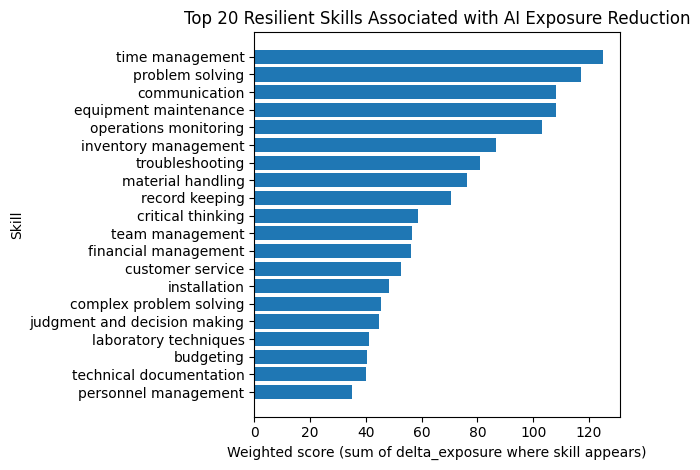

In [4]:
weighted_counter = Counter()

for _, row in df.iterrows():
    delta = float(row["delta_exposure"])
    for skill in row["missing_skills"]:
        weighted_counter[skill] += delta

top_weighted = pd.DataFrame(
    weighted_counter.most_common(top_n),
    columns=["skill", "weighted_score"]
)

plt.figure()
plt.barh(top_weighted["skill"][::-1], top_weighted["weighted_score"][::-1])
plt.title(f"Top {top_n} Resilient Skills Associated with AI Exposure Reduction")
plt.xlabel("Weighted score (sum of delta_exposure where skill appears)")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

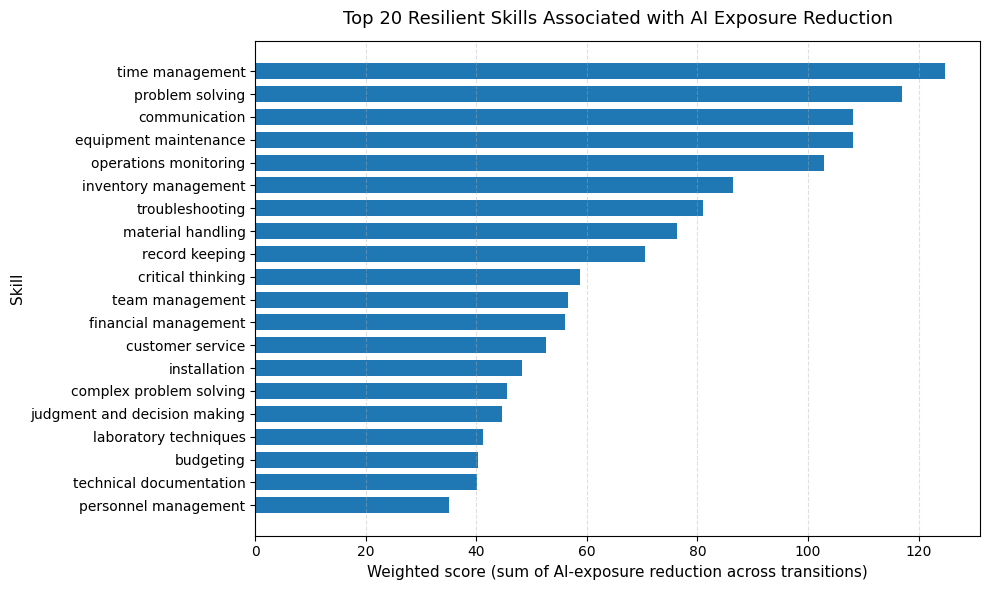

In [5]:
plt.figure(figsize=(10, 6))   # ⬅ bigger and wider

plt.barh(
    top_weighted["skill"][::-1],
    top_weighted["weighted_score"][::-1],
    height=0.7                # ⬅ slightly thicker bars
)

plt.title(
    f"Top {top_n} Resilient Skills Associated with AI Exposure Reduction",
    fontsize=13,
    pad=12
)

plt.xlabel(
    "Weighted score (sum of AI-exposure reduction across transitions)",
    fontsize=11
)

plt.ylabel("Skill", fontsize=11)

# Clean, subtle grid (x-axis only)
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Improve tick readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()
